<a href="https://colab.research.google.com/github/SalmanOkz/Deep_Learning_Finance_Project/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ============================================
# 0. Imports & Global Settings
# ============================================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Plot style
sns.set(style="whitegrid")


In [2]:
# ============================================
# 1. Load Dataset
# ============================================
df = pd.read_csv("/content/creditcard.csv")  # change path if needed

print("Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nInfo:")
print(df.info())

print("\nSummary stats for 'Time' and 'Amount':")
display(df[['Time', 'Amount']].describe())


Shape: (284807, 31)

First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000



Class distribution:


,Count,Percentage
Class,,
0,284315,99.8273
1,492,0.1727


/tmp/ipython-input-929320083.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='coolwarm')


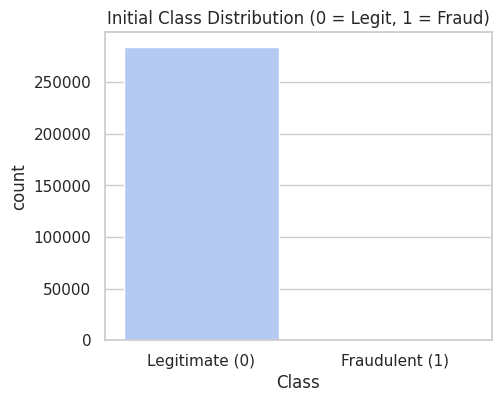

In [3]:
# Class distribution
class_counts = df['Class'].value_counts()
class_percent = df['Class'].value_counts(normalize=True) * 100

print("\nClass distribution:")
display(pd.DataFrame({
    "Count": class_counts,
    "Percentage": class_percent.round(4)
}))

plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title('Initial Class Distribution (0 = Legit, 1 = Fraud)')
plt.xticks([0,1], ['Legitimate (0)', 'Fraudulent (1)'])
plt.show()


In [4]:
# ============================================
# 2. Missing Values & Cleaning
# ============================================
print("\nMissing values per column:")
display(df.isnull().sum())

# Drop rows with any nulls (for this dataset it should be none, but this is "cleaning")
df = df.dropna()
print("\nAfter dropping nulls, shape:", df.shape)



Missing values per column:


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0



After dropping nulls, shape: (284807, 31)


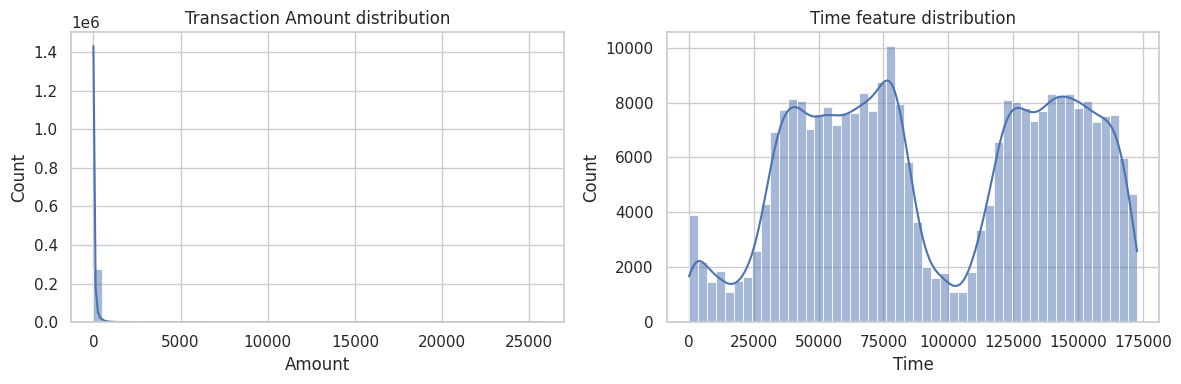

In [5]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount distribution")

plt.subplot(1,2,2)
sns.histplot(df['Time'], bins=50, kde=True)
plt.title("Time feature distribution")

plt.tight_layout()
plt.show()


In [6]:
# ============================================
# 3. Train / Validation / Test Split
#    70% train, 15% val, 15% test
# ============================================
X = df.drop('Class', axis=1)
y = df['Class']

# First split: Train (70%) + Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

# Second split: Temp -> Val (15%) + Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

print(f"Training set:   {len(X_train)}")
print(f"Validation set: {len(X_val)}")
print(f"Test set:       {len(X_test)}")

print("\nValidation class distribution (%):")
print(y_val.value_counts(normalize=True) * 100)

print("\nTest class distribution (%):")
print(y_test.value_counts(normalize=True) * 100)


Training set:   199364
Validation set: 42721
Test set:       42722

Validation class distribution (%):
Class
0    99.826783
1     0.173217
Name: proportion, dtype: float64

Test class distribution (%):
Class
0    99.826787
1     0.173213
Name: proportion, dtype: float64


In [7]:
# ============================================
# 4. Feature Scaling (Time & Amount) - no data leak
# ============================================
scaler = StandardScaler()

# Fit on TRAIN only
X_train_scaled = X_train.copy()
X_val_scaled   = X_val.copy()
X_test_scaled  = X_test.copy()

cols_to_scale = ['Time', 'Amount']

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_val_scaled[cols_to_scale]   = scaler.transform(X_val[cols_to_scale])
X_test_scaled[cols_to_scale]  = scaler.transform(X_test[cols_to_scale])

print("\nScaled 'Time' and 'Amount' on train and applied to val/test.")



Scaled 'Time' and 'Amount' on train and applied to val/test.



Before SMOTE:
Class
0    199020
1       344
Name: count, dtype: int64

After SMOTE:
Class
0    199020
1     39804
Name: count, dtype: int64


/tmp/ipython-input-3848205295.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=ax[0], palette='coolwarm')
/tmp/ipython-input-3848205295.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Legit (0)', 'Fraud (1)'])
/tmp/ipython-input-3848205295.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_res, ax=ax[1], palette='coolwarm')
/tmp/ipython-input-3848205295.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Legit (0)', 'Fraud (1)'])


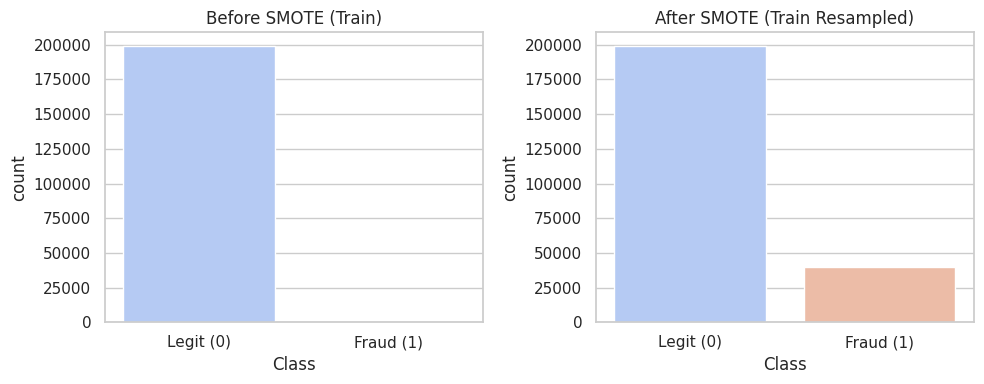

In [8]:
# ============================================
# 5. Handle Imbalance with SMOTE (Train only)
# ============================================
smote = SMOTE(sampling_strategy=0.2, random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("\nBefore SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_res.value_counts())

# Visualize before vs after
fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.countplot(x=y_train, ax=ax[0], palette='coolwarm')
ax[0].set_title('Before SMOTE (Train)')
ax[0].set_xticklabels(['Legit (0)', 'Fraud (1)'])

sns.countplot(x=y_train_res, ax=ax[1], palette='coolwarm')
ax[1].set_title('After SMOTE (Train Resampled)')
ax[1].set_xticklabels(['Legit (0)', 'Fraud (1)'])

plt.tight_layout()
plt.show()

# Convert to numpy for Keras
X_train_res = X_train_res.values
X_val_np    = X_val_scaled.values
X_test_np   = X_test_scaled.values
y_train_res = y_train_res.values
y_val_np    = y_val.values
y_test_np   = y_test.values


In [9]:
# ============================================
# 6. Helper Functions
# ============================================
def plot_training_history(history, title_prefix=""):
    hist = history.history

    plt.figure(figsize=(12,4))

    # Loss
    plt.subplot(1,2,1)
    plt.plot(hist['loss'], label='Train Loss')
    plt.plot(hist['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{title_prefix} Training vs Validation Loss')
    plt.legend()

    # Recall
    if 'recall' in hist and 'val_recall' in hist:
        plt.subplot(1,2,2)
        plt.plot(hist['recall'], label='Train Recall')
        plt.plot(hist['val_recall'], label='Val Recall')
        plt.xlabel('Epoch')
        plt.ylabel('Recall')
        plt.title(f'{title_prefix} Training vs Validation Recall')
        plt.legend()

    plt.tight_layout()
    plt.show()


def evaluate_model(model, X_test, y_test, threshold=0.5, title="Model"):
    # Predictions
    y_pred_prob = model.predict(X_test).ravel()
    y_pred = (y_pred_prob >= threshold).astype(int)



    print(f"\n=== {title} - Classification Report ===")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # ROC-AUC
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    print(f"{title} ROC-AUC: {roc_auc:.4f}")

    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


Input feature dimension: 30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9429 - auc: 0.9424 - loss: 0.1738 - precision: 0.8610 - recall: 0.8175 - val_accuracy: 0.9964 - val_auc: 0.9680 - val_loss: 0.0190 - val_precision: 0.3088 - val_recall: 0.8514
Epoch 2/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9886 - auc: 0.9982 - loss: 0.0343 - precision: 0.9781 - recall: 0.9526 - val_accuracy: 0.9976 - val_auc: 0.9349 - val_loss: 0.0128 - val_precision: 0.4094 - val_recall: 0.8243
Epoch 3/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9929 - auc: 0.9994 - loss: 0.0209 - precision: 0.9803 - recall: 0.9767 - val_accuracy: 0.9974 - val_auc: 0.9165 - val_loss: 0.0118 - val_precision: 0.3836 - val_recall: 0.8243
Epoch 4/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9954 - auc: 0.9997 - loss: 0.0141 - precision: 0.9831 - recall: 0.9895 - val_accuracy: 0.9983 - val_auc: 0.9109 - val_loss: 0.0105 - val_precision: 0.5043 - val_recall: 0.7973
Epoch 5/50
933/933 ━━━━━━━━━━━━

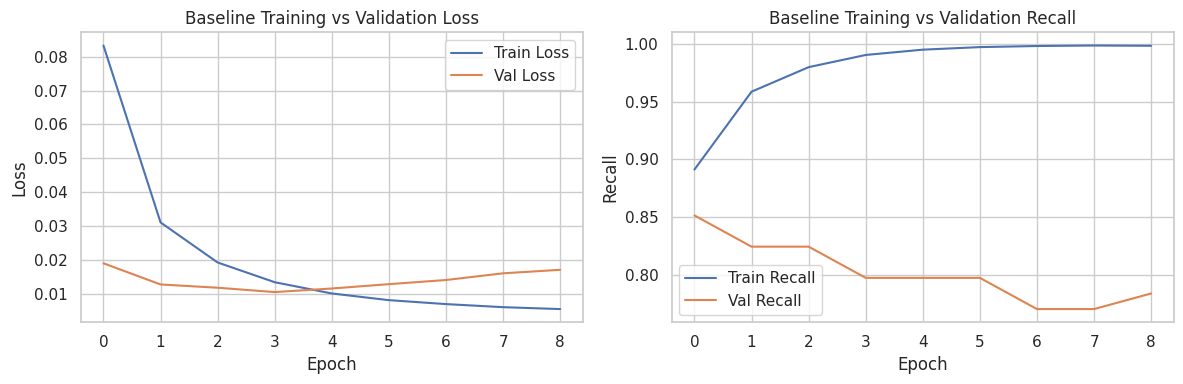

1336/1336 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

=== Baseline Model - Classification Report ===
              precision    recall  f1-score   support

           0     0.9997    0.9990    0.9993     42648
           1     0.5825    0.8108    0.6780        74

    accuracy                         0.9987     42722
   macro avg     0.7911    0.9049    0.8386     42722
weighted avg     0.9989    0.9987    0.9988     42722



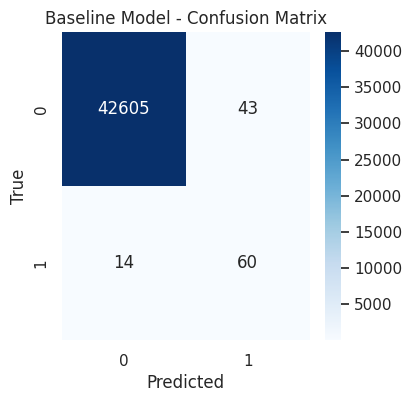

Baseline Model ROC-AUC: 0.9760


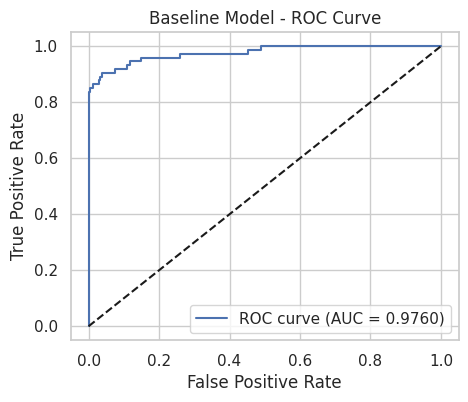

In [10]:
# ============================================
# 7. Baseline Neural Network
# ============================================
input_dim = X_train_res.shape[1]
print("Input feature dimension:", input_dim)

baseline_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dropout(0.4),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc', curve='ROC')
    ]
)

baseline_model.summary()

# Early stopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

EPOCHS = 50
BATCH_SIZE = 256

history_baseline = baseline_model.fit(
    X_train_res, y_train_res,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_np, y_val_np),
    callbacks=[early_stop],
    verbose=1
)

plot_training_history(history_baseline, title_prefix="Baseline")

# Evaluate baseline on TEST
evaluate_model(baseline_model, X_test_np, y_test_np, title="Baseline Model")


In [11]:
# ============================================
# 8. Hyperparameter Tuning (manual search)
#    - Optimizer: Adam, RMSprop, SGD
#    - Activation: ReLU, LeakyReLU, GELU
#    - Dropout: 0.3, 0.5
#    - L2 regularization added
# ============================================

def build_model_hparam(input_dim, activation='relu', optimizer_name='adam',
                       dropout_rate=0.4, l2_lambda=1e-3, learning_rate=1e-3):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))

    # Helper to add dense + chosen activation
    def add_block(units):
        model.add(layers.Dense(units, kernel_regularizer=keras.regularizers.l2(l2_lambda)))
        if activation == 'relu':
            model.add(layers.ReLU())
        elif activation == 'leaky_relu':
            model.add(layers.LeakyReLU(alpha=0.1))
        elif activation == 'gelu':
            model.add(layers.Activation(tf.keras.activations.gelu))
        else:
            model.add(layers.ReLU())

        model.add(layers.Dropout(dropout_rate))

    # Try slightly deeper network
    add_block(64)
    add_block(48)
    add_block(32)

    model.add(layers.Dense(1, activation='sigmoid'))

    # Optimizer selection
    if optimizer_name.lower() == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name.lower() == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer_name.lower() == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    else:
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall'),
            keras.metrics.AUC(name='auc', curve='ROC')
        ]
    )

    return model


optimizers = ['adam', 'rmsprop', 'sgd']
activations = ['relu', 'leaky_relu', 'gelu']
dropouts   = [0.3, 0.5]

results = []

EPOCHS_TUNE = 40
BATCH_TUNE  = 512

for opt in optimizers:
    for act in activations:
        for dr in dropouts:
            print(f"\n===== Training with optimizer={opt}, activation={act}, dropout={dr} =====")
            model = build_model_hparam(
                input_dim=input_dim,
                activation=act,
                optimizer_name=opt,
                dropout_rate=dr,
                l2_lambda=1e-4,
                learning_rate=1e-3
            )

            early_stop_tune = keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=4,
                restore_best_weights=True
            )

            history = model.fit(
                X_train_res, y_train_res,
                epochs=EPOCHS_TUNE,
                batch_size=BATCH_TUNE,
                validation_data=(X_val_np, y_val_np),
                callbacks=[early_stop_tune],
                verbose=0  # set to 1 if you want to see details
            )

            # Get best val metrics from history
            best_epoch = np.argmin(history.history['val_loss'])
            val_recall = history.history['val_recall'][best_epoch]
            val_auc    = history.history['val_auc'][best_epoch]

            results.append({
                'optimizer': opt,
                'activation': act,
                'dropout': dr,
                'best_epoch': int(best_epoch),
                'val_recall': float(val_recall),
                'val_auc': float(val_auc)
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
display(results_df.sort_values(by=['val_recall','val_auc'], ascending=False).head(10))



===== Training with optimizer=adam, activation=relu, dropout=0.3 =====

===== Training with optimizer=adam, activation=relu, dropout=0.5 =====

===== Training with optimizer=adam, activation=leaky_relu, dropout=0.3 =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(



===== Training with optimizer=adam, activation=leaky_relu, dropout=0.5 =====

===== Training with optimizer=adam, activation=gelu, dropout=0.3 =====

===== Training with optimizer=adam, activation=gelu, dropout=0.5 =====

===== Training with optimizer=rmsprop, activation=relu, dropout=0.3 =====

===== Training with optimizer=rmsprop, activation=relu, dropout=0.5 =====

===== Training with optimizer=rmsprop, activation=leaky_relu, dropout=0.3 =====

===== Training with optimizer=rmsprop, activation=leaky_relu, dropout=0.5 =====

===== Training with optimizer=rmsprop, activation=gelu, dropout=0.3 =====

===== Training with optimizer=rmsprop, activation=gelu, dropout=0.5 =====

===== Training with optimizer=sgd, activation=relu, dropout=0.3 =====

===== Training with optimizer=sgd, activation=relu, dropout=0.5 =====

===== Training with optimizer=sgd, activation=leaky_relu, dropout=0.3 =====

===== Training with optimizer=sgd, activation=leaky_relu, dropout=0.5 =====

===== Training with

,optimizer,activation,dropout,best_epoch,val_recall,val_auc
14,sgd,leaky_relu,0.3,39,0.851351,0.966068
17,sgd,gelu,0.5,39,0.851351,0.964112
16,sgd,gelu,0.3,39,0.837838,0.963140
12,sgd,relu,0.3,39,0.837838,0.957520
15,sgd,leaky_relu,0.5,39,0.837838,0.956897
13,sgd,relu,0.5,37,0.824324,0.957860
11,rmsprop,gelu,0.5,8,0.824324,0.916461
9,rmsprop,leaky_relu,0.5,18,0.824324,0.911540
5,adam,gelu,0.5,10,0.824324,0.909597
10,rmsprop,gelu,0.3,13,0.810811,0.917652



Best hyperparameters found:
optimizer            sgd
activation    leaky_relu
dropout              0.3
best_epoch            39
val_recall      0.851351
val_auc         0.966068
Name: 14, dtype: object
Epoch 1/60


/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


467/467 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.7899 - auc: 0.8022 - loss: 0.4894 - precision: 0.4870 - recall: 0.6962 - val_accuracy: 0.9944 - val_auc: 0.9672 - val_loss: 0.0827 - val_precision: 0.2077 - val_recall: 0.7973
Epoch 2/60
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9669 - auc: 0.9619 - loss: 0.1481 - precision: 0.9605 - recall: 0.8355 - val_accuracy: 0.9924 - val_auc: 0.9815 - val_loss: 0.0535 - val_precision: 0.1635 - val_recall: 0.8243
Epoch 3/60
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9712 - auc: 0.9746 - loss: 0.1183 - precision: 0.9608 - recall: 0.8621 - val_accuracy: 0.9918 - val_auc: 0.9874 - val_loss: 0.0469 - val_precision: 0.1537 - val_recall: 0.8243
Epoch 4/60
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9724 - auc: 0.9806 - loss: 0.1076 - precision: 0.9589 - recall: 0.8711 - val_accuracy: 0.9920 - val_auc: 0.9889 - val_loss: 0.0447 - val_precision: 0.1560 - val_recall: 0.8243
Epoch 5/60
467/467 ━━━━━━━━━━━━━━━━━━━━ 2

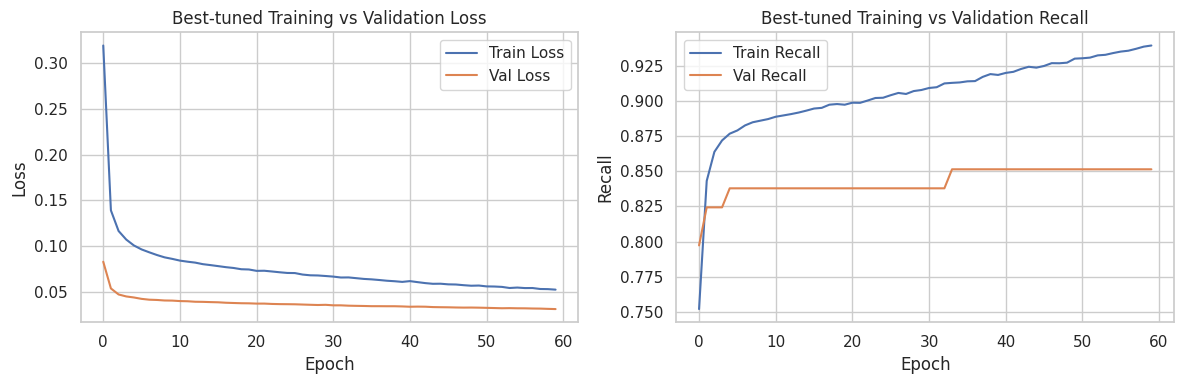

1336/1336 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

=== Best-Tuned Model - Classification Report ===
              precision    recall  f1-score   support

           0     0.9997    0.9959    0.9978     42648
           1     0.2616    0.8378    0.3987        74

    accuracy                         0.9956     42722
   macro avg     0.6307    0.9169    0.6983     42722
weighted avg     0.9984    0.9956    0.9968     42722



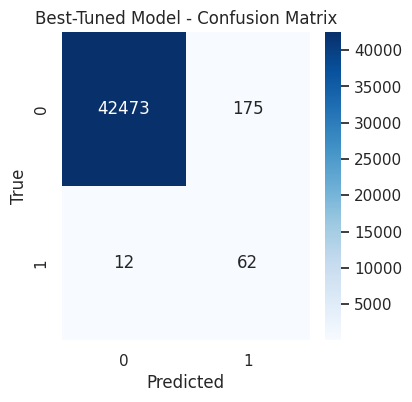

Best-Tuned Model ROC-AUC: 0.9707


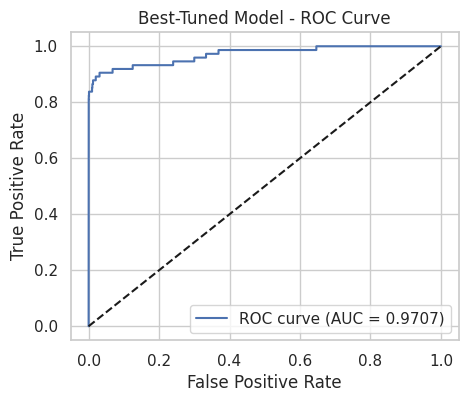

In [18]:
# ============================================
# 9. Train Final Model with Best Hyperparams
# ============================================
best = results_df.sort_values(by=['val_recall','val_auc'], ascending=False).iloc[0]
print("\nBest hyperparameters found:")
print(best)

best_model = build_model_hparam(
    input_dim=input_dim,
    activation=best['activation'],
    optimizer_name=best['optimizer'],
    dropout_rate=best['dropout'],
    l2_lambda=1e-4,
    learning_rate=1e-3
)

early_stop_final = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_best = best_model.fit(
    X_train_res, y_train_res,
    epochs=60,
    batch_size=512,
    validation_data=(X_val_np, y_val_np),
    callbacks=[early_stop_final],
    verbose=1
)

plot_training_history(history_best, title_prefix="Best-tuned")

evaluate_model(best_model, X_test_np, y_test_np, title="Best-Tuned Model")


In [19]:
# Get the predicted probabilities for the validation set
y_scores = best_model.predict(X_val_np).ravel()  # Flatten the predictions


1336/1336 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [20]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall curve calculate
prec, rec, thresholds = precision_recall_curve(y_val_np, y_scores)

# Set the target recall to 0.80
target_recall = 0.80
idx = np.argmin(np.abs(rec - target_recall))  # Find the index closest to target recall
best_thr = thresholds[idx]  # Choose the best threshold

print("Chosen threshold:", best_thr)


Chosen threshold: 0.8437428


In [21]:
# Apply the best threshold to the predicted probabilities
y_pred = (y_scores >= best_thr).astype(int)  # Convert probabilities to binary predictions (0 or 1)


              precision    recall  f1-score   support

           0     0.9996    0.9992    0.9994     42647
           1     0.6344    0.7973    0.7066        74

    accuracy                         0.9989     42721
   macro avg     0.8170    0.8983    0.8530     42721
weighted avg     0.9990    0.9989    0.9989     42721



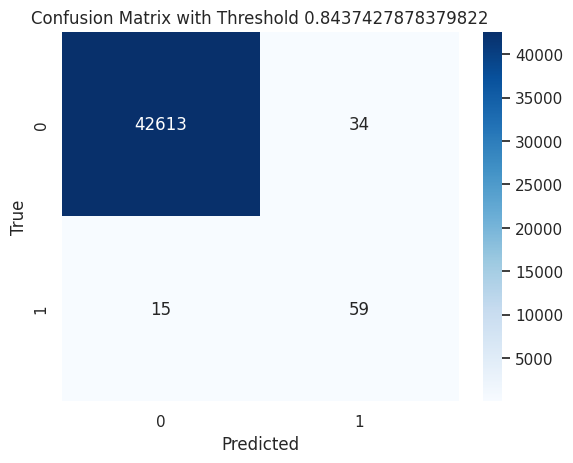

In [22]:
# Evaluate the performance with the new threshold
print(classification_report(y_val_np, y_pred, digits=4))

# Confusion matrix for visualizing the result
cm = confusion_matrix(y_val_np, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix with Threshold {best_thr}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [17]:
# Get the predicted probabilities for the test set
y_test_scores = best_model.predict(X_test_np).ravel()

# Apply the best threshold to the test set predictions
y_test_pred = (y_test_scores >= best_thr).astype(int)

# Evaluate the performance on the test set
print(classification_report(y_test_np, y_test_pred, digits=4))


1336/1336 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0     0.9997    0.9990    0.9994     42648
           1     0.6019    0.8378    0.7006        74

    accuracy                         0.9988     42722
   macro avg     0.8008    0.9184    0.8500     42722
weighted avg     0.9990    0.9988    0.9989     42722



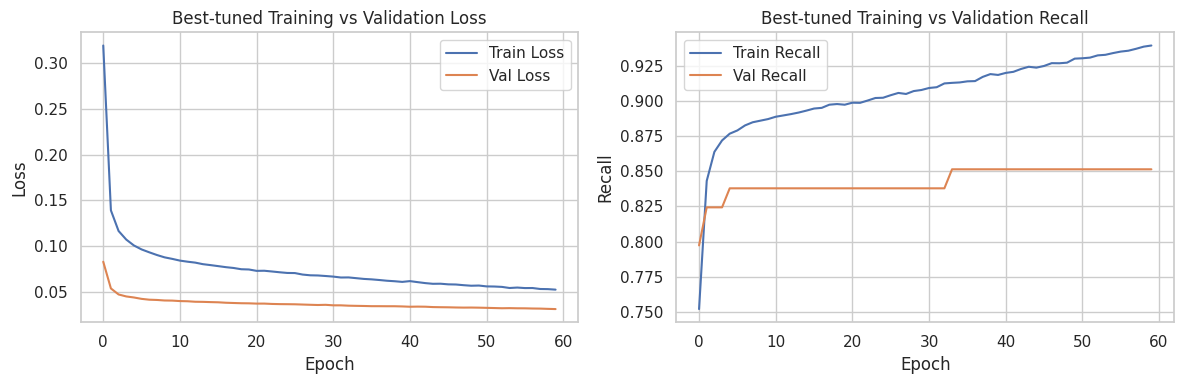

1336/1336 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

=== Best-Tuned Model - Classification Report ===
              precision    recall  f1-score   support

           0     0.9997    0.9959    0.9978     42648
           1     0.2616    0.8378    0.3987        74

    accuracy                         0.9956     42722
   macro avg     0.6307    0.9169    0.6983     42722
weighted avg     0.9984    0.9956    0.9968     42722



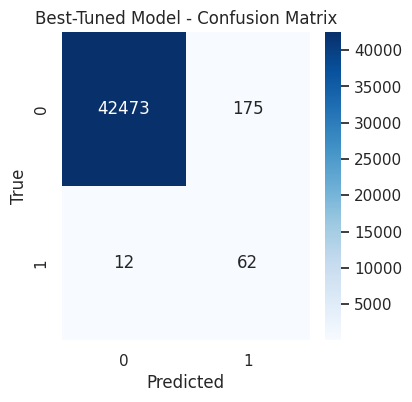

Best-Tuned Model ROC-AUC: 0.9707


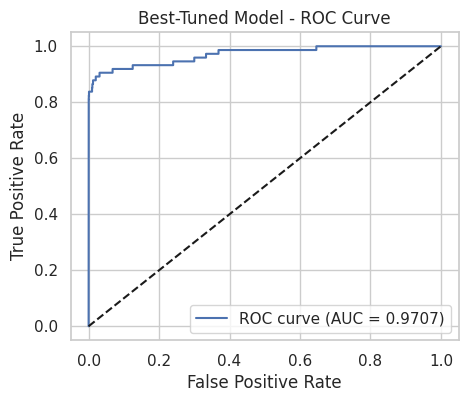

In [23]:
# Step 4: Plot the training history (already trained model)
plot_training_history(history_best, title_prefix="Best-tuned")

# Step 5: Evaluate the model on test data using the best threshold
evaluate_model(best_model, X_test_np, y_test_np, title="Best-Tuned Model")